In [2]:
import torchvision
import torchvision.transforms as tranforms
data_dir = './fashion_mnist/'
tranform = tranforms.Compose([tranforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(data_dir, train=True, transform=tranform,download=True)

26422272it [00:12, 2169065.65it/s]                              


Extracting ./fashion_mnist/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST\raw



29696it [00:00, 153184.55it/s]                          


Extracting ./fashion_mnist/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST\raw



4422656it [00:03, 1161422.43it/s]                             


Extracting ./fashion_mnist/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST\raw



6144it [00:00, 6145910.75it/s]          

Extracting ./fashion_mnist/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST\raw



训练数据集条数 60000
测试数据集条数 10000


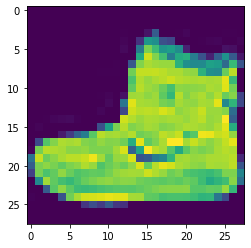

该图片的标签为： 9


In [3]:
print("训练数据集条数",len(train_dataset))
val_dataset  = torchvision.datasets.FashionMNIST(root=data_dir, train=False, transform=tranform)
print("测试数据集条数",len(val_dataset))
import pylab
im = train_dataset[0][0]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()
print("该图片的标签为：",train_dataset[0][1])


In [4]:
############数据集的制作
import torch
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

样本形状： torch.Size([10, 1, 28, 28])
样本标签： tensor([8, 2, 8, 0, 1, 6, 2, 9, 2, 0])
图片形状： torch.Size([3, 32, 302])
  Bag,Pullover,  Bag,T-shirt,Trouser,Shirt,Pullover,Ankle_Boot,Pullover,T-shirt


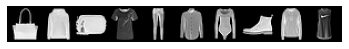

In [5]:
from matplotlib import pyplot as plt
import numpy as np
def imshow(img):
    print("图片形状：",np.shape(img))
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot')
sample = iter(train_loader)
images, labels = sample.next()
print('样本形状：',np.shape(images))
print('样本标签：',labels)
imshow(torchvision.utils.make_grid(images,nrow=batch_size))
print(','.join('%5s' % classes[labels[j]] for j in range(len(images))))

In [8]:
from torch.nn import functional as F

class myConNet(torch.nn.Module):
    def __init__(self):
        super(myConNet, self).__init__()
        #定义卷积层
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        #定义全连接层
        self.fc1 = torch.nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120, out_features=60)
        self.out = torch.nn.Linear(in_features=60, out_features=10)

    def forward(self, t):#搭建正向结构
        #第一层卷积和池化处理
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #第二层卷积和池化处理
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        #搭建全连接网络，第一层全连接
        t = t.reshape(-1, 12 * 4 * 4)#将卷积结果由4维变为2维
        t = self.fc1(t)
        t = F.relu(t)
        #第二层全连接
        t = self.fc2(t)
        t = F.relu(t)
        #第三层全连接
        t = self.out(t)
        return t
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
network = myConNet()
network.to(device)
print(network)
criterion = torch.nn.CrossEntropyLoss()  #实例化损失函数类
optimizer = torch.optim.Adam(network.parameters(), lr=.01)
for epoch in range(2): #数据集迭代2次
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0): #循环取出批次数据
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) #
        optimizer.zero_grad()#清空之前的梯度
        outputs = network(inputs)
        loss = criterion(outputs, labels)#计算损失
        loss.backward()  #反向传播
        optimizer.step() #更新参数

        running_loss += loss.item()
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
# 保存模型
torch.save(network.state_dict(), './CNNFashionMNIST.pth')

cuda:0
myConNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)
[1,  1000] loss: 0.447
[1,  2000] loss: 0.325
[1,  3000] loss: 0.304
[1,  4000] loss: 0.289
[1,  5000] loss: 0.275
[1,  6000] loss: 0.275
[2,  1000] loss: 0.283
[2,  2000] loss: 0.265
[2,  3000] loss: 0.273
[2,  4000] loss: 0.265
[2,  5000] loss: 0.269
[2,  6000] loss: 0.265
Finished Training
